___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [51]:
df0 = pd.read_csv('Churn_Modelling.csv', index_col = "RowNumber")
df = df0.copy()
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [52]:
df.info()  # missing value yoktur.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [53]:
df.shape

(10000, 13)

In [54]:
df.isnull().sum().any()

False

In [55]:
df.duplicated().sum() #duplicated verimiz yoktur.

0

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [57]:
df.drop(['CustomerId','Surname'], axis=1, inplace= True)

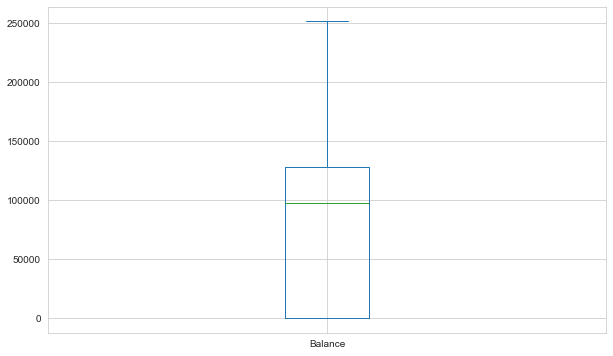

In [58]:
df.Balance.plot(kind = "box"); # Outlier degerimiz yoktur.

In [59]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

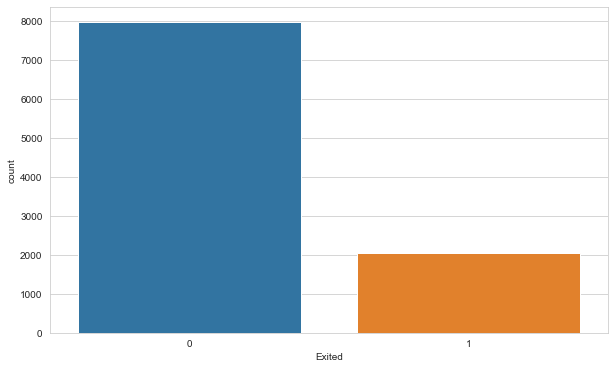

In [60]:
sns.countplot(df["Exited"]); 
#Skorlarimiza baktiktan sonra balanced or imbalanced olduguna karar verecegiz.

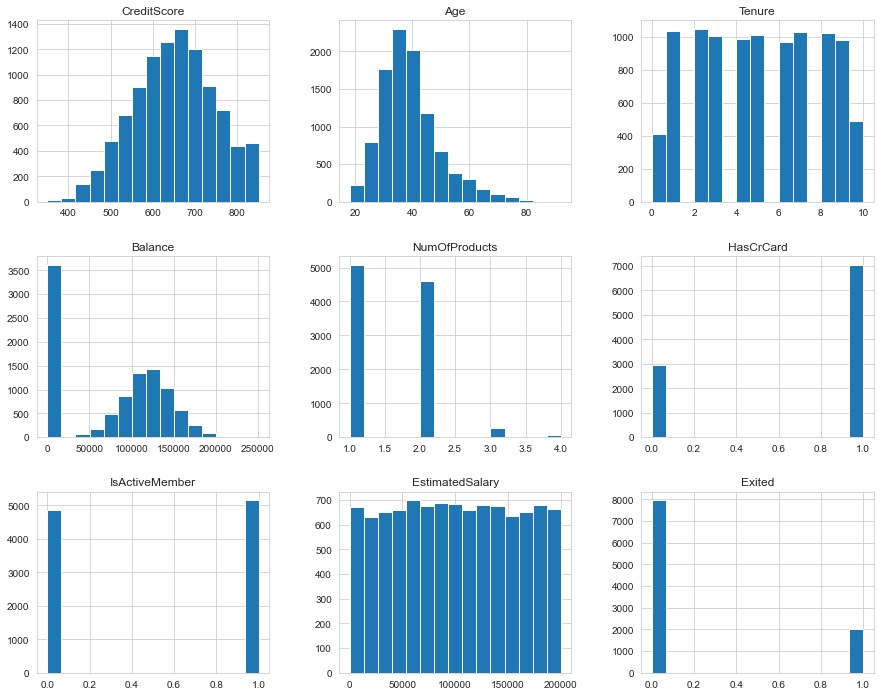

In [61]:
df.hist(figsize=(15,12), bins=15);

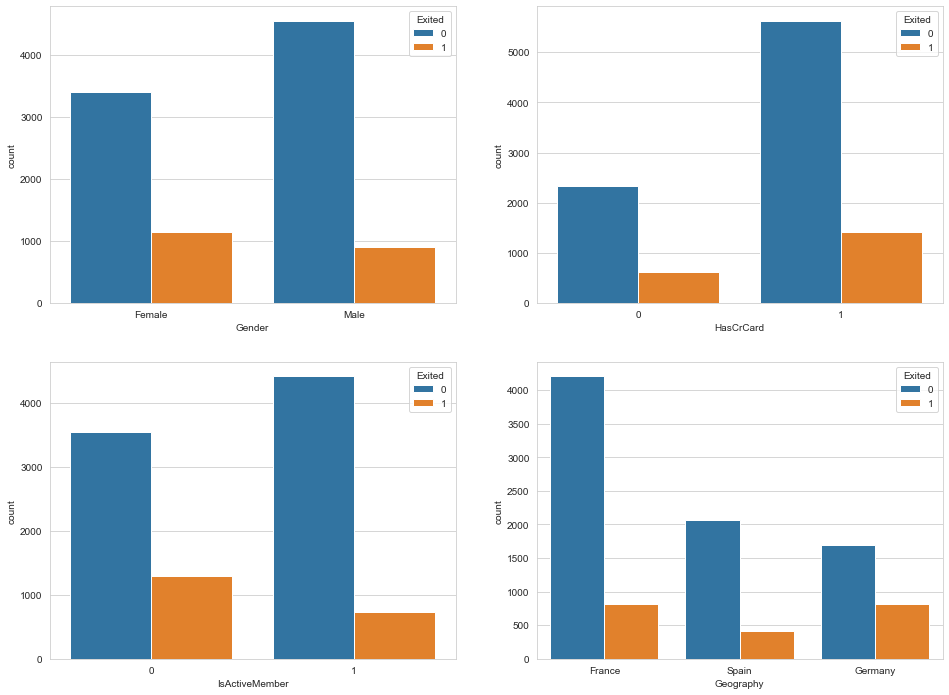

In [62]:
cat_list = ["Gender","HasCrCard","IsActiveMember","Geography"]
index = 0
plt.figure(figsize=(16,12))
for i in cat_list:
    index += 1
    plt.subplot(2,2,index)
    sns.countplot(data=df, x = i, hue="Exited");

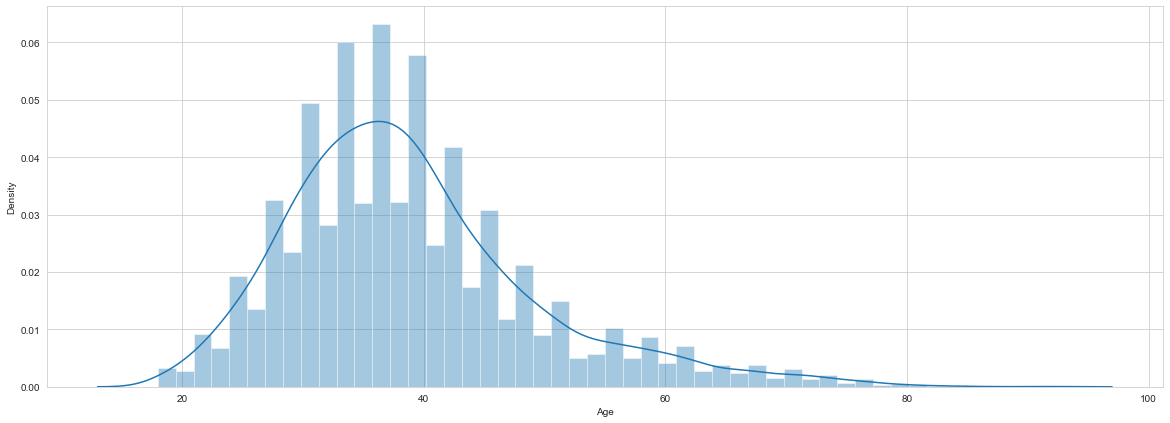

In [63]:
plt.figure(figsize=(20,7))
sns.distplot(df.Age);

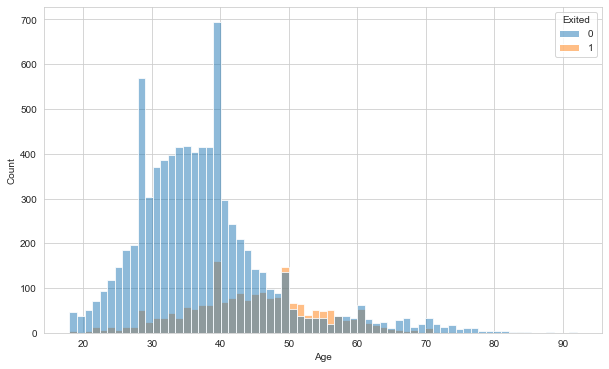

In [64]:
sns.histplot(data = df,x ="Age", hue ="Exited", fill =True);

# Yasli insanlar daha cok ayriliyor.

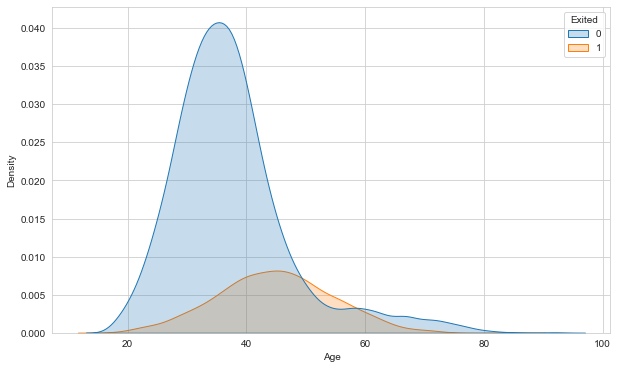

In [65]:
sns.kdeplot(data=df, x = "Age", hue = "Exited", fill=True);

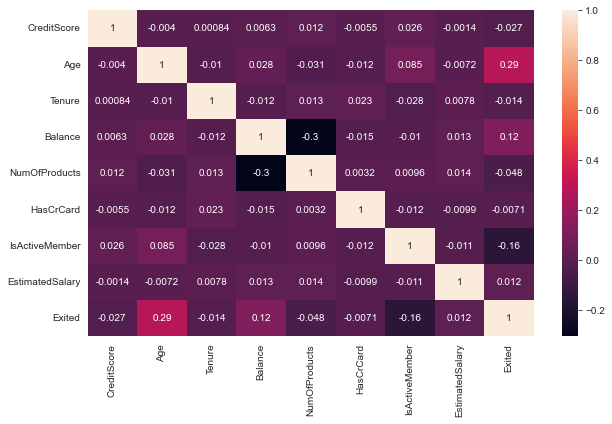

In [66]:
sns.heatmap(df.corr(), annot = True);


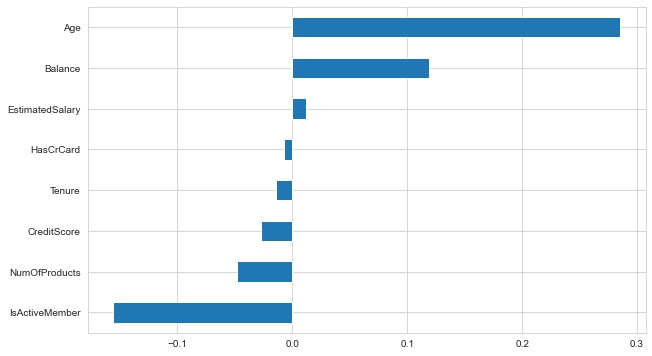

In [67]:
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");


In [68]:
df = pd.get_dummies(df, drop_first = True);
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [70]:
seed = 42

In [71]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)


In [73]:
scaler = MinMaxScaler()

In [74]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [76]:
X_train.shape

(9000, 11)

In [77]:
X_test.shape

(1000, 11)

## without class_weigth

### Create The Model

In [78]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr =0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6147 - recall: 0.1501 - val_loss: 0.5111 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5009 - recall: 0.0000e+00 - val_loss: 0.4853 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.0000e+00 - val_loss: 0.4669 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4696 - recall: 0.0030 - val_loss: 0.4506 - val_recall: 0.0221
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4587 - recall: 0.0769 - val_loss: 0.4368 - val_recall: 0.1271
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4469 - recall: 0.1041 - val_loss: 0.4245 - val_recall: 0.1381
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.1616 - val_loss: 0.4088 - val_recall: 0.2265
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2934 - val_recall: 0.5470
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3355 - recall: 0.4522 - val_loss: 0.2954 - val_recall: 0.5746
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4643 - val_loss: 0.2936 - val_recall: 0.5525
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3348 - recall: 0.4588 - val_loss: 0.2923 - val_recall: 0.5746
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3362 - recall: 0.4607 - val_loss: 0.2987 - val_recall: 0.6188
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3340 - recall: 0.4473 - val_loss: 0.2944 - val_recall: 0.5470
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3341 - recall: 0.4703 - val_loss: 0.2995 - val_recall: 0.5967
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3245 - recall: 0.4734 - val_loss: 0.2956 - val_recall: 0.5746
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3262 - recall: 0.4728 - val_loss: 0.2924 - val_recall: 0.5414
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3256 - recall: 0.4782 - val_loss: 0.2948 - val_recall: 0.5691
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.4927 - val_loss: 0.2954 - val_recall: 0.4807
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3263 - recall: 0.4843 - val_loss: 0.2989 - val_recall: 0.5028
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4855 - val_loss: 0.2966 - val_recall: 0.5193
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3261 - recall: 0.4867 - val_loss: 0.2935 - val_recall: 0.5359
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3210 - recall: 0.5006 - val_loss: 0.3064 - val_recall: 0.5967
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.4909 - val_loss: 0.3003 - val_recall: 0.4917
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4933 - val_loss: 0.3011 - val_recall: 0.6022
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.4964 - val_loss: 0.3042 - val_recall: 0.5801
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3202 - recall: 0.4988 - val_loss: 0.3000 - val_recall: 0.4917
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - recall: 0.5061 - val_loss: 0.2988 - val_recall: 0.5359
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.4964 - val_loss: 0.2995 - val_recall: 0.5525
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5073 - val_loss: 0.3006 - val_recall: 0.4807
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.4964 - val_loss: 0.2993 - val_recall: 0.5912
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5151 - val_loss: 0.3048 - val_recall: 0.5635
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5115 - val_loss: 0.3018 - val_recall: 0.5193
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3135 - recall: 0.5121 - val_loss: 0.3029 - val_recall: 0.4972
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.5061 - val_loss: 0.3097 - val_recall: 0.4641
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4946 - val_loss: 0.3058 - val_recall: 0.5856
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3105 - recall: 0.5121 - val_loss: 0.3049 - val_recall: 0.5635
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3115 - recall: 0.5127 - val_loss: 0.3035 - val_recall: 0.5801
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5176 - val_loss: 0.3048 - val_recall: 0.5525
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3100 - recall: 0.5254 - val_loss: 0.3022 - val_recall: 0.4972
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3103 - recall: 0.5145 - val_loss: 0.3036 - val_recall: 0.5414


In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                384       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


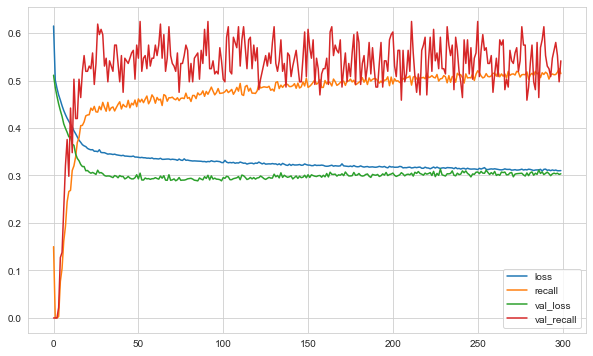

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.615,0.150,0.511,0.000
1,0.501,0.000,0.485,0.000
2,0.484,0.000,0.467,0.000
3,0.470,0.003,0.451,0.022
4,0.459,0.077,0.437,0.127


In [83]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[767  29]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.77      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.76      1000
weighted avg       0.86      0.86      0.85      1000



32/32 [==============================] - 0s 1ms/step


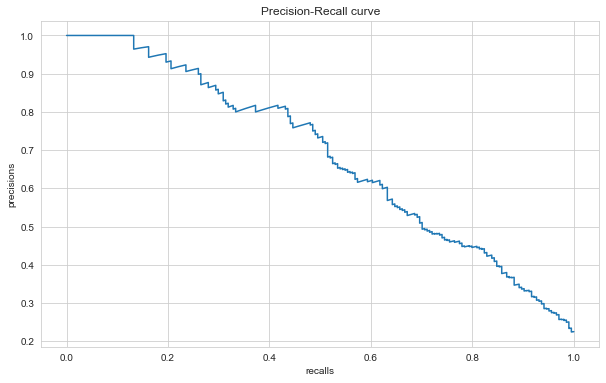

In [84]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [85]:
average_precision_score(y_test, y_pred_proba)

0.6842787176917332

## with class_weigth

### Create The Model

In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr =0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [87]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [88]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6834 - recall: 0.7778 - val_loss: 0.6916 - val_recall: 0.7680
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6503 - recall: 0.6883 - val_loss: 0.6544 - val_recall: 0.7735
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6230 - recall: 0.6665 - val_loss: 0.5958 - val_recall: 0.7182
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6041 - recall: 0.6943 - val_loss: 0.5693 - val_recall: 0.7072
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5892 - recall: 0.7046 - val_loss: 0.5499 - val_recall: 0.6796
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5744 - recall: 0.7028 - val_loss: 0.4951 - val_recall: 0.6464
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5607 - recall: 0.7191 - val_loss: 0.5337 - val_recall: 0.7790
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4572 - recall: 0.7542 - val_loss: 0.4437 - val_recall: 0.8343
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4568 - recall: 0.7597 - val_loss: 0.4510 - val_recall: 0.8343
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4561 - recall: 0.7633 - val_loss: 0.4457 - val_recall: 0.8287
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4555 - recall: 0.7585 - val_loss: 0.4466 - val_recall: 0.8343
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4585 - recall: 0.7554 - val_loss: 0.4744 - val_recall: 0.8453
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4550 - recall: 0.7621 - val_loss: 0.4092 - val_recall: 0.7956
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4559 - recall: 0.7694 - val_loss: 0.4438 - val_recall: 0.8287
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4412 - recall: 0.7760 - val_loss: 0.4199 - val_recall: 0.8011
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4405 - recall: 0.7821 - val_loss: 0.4039 - val_recall: 0.7901
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4396 - recall: 0.7772 - val_loss: 0.4484 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4472 - recall: 0.7797 - val_loss: 0.3769 - val_recall: 0.7845
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4423 - recall: 0.7718 - val_loss: 0.3918 - val_recall: 0.7845
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4396 - recall: 0.7797 - val_loss: 0.4105 - val_recall: 0.8066
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4422 - recall: 0.7766 - val_loss: 0.4003 - val_recall: 0.7845
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4335 - recall: 0.7748 - val_loss: 0.4510 - val_recall: 0.8232
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4312 - recall: 0.7754 - val_loss: 0.3998 - val_recall: 0.8066
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.7778 - val_loss: 0.4355 - val_recall: 0.8232
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4318 - recall: 0.7815 - val_loss: 0.4336 - val_recall: 0.8066
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4317 - recall: 0.7803 - val_loss: 0.3829 - val_recall: 0.7680
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4307 - recall: 0.7839 - val_loss: 0.4044 - val_recall: 0.8122
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4301 - recall: 0.7754 - val_loss: 0.4042 - val_recall: 0.7956
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4243 - recall: 0.7845 - val_loss: 0.3769 - val_recall: 0.7845
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4272 - recall: 0.7785 - val_loss: 0.4417 - val_recall: 0.8177
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4221 - recall: 0.7821 - val_loss: 0.4278 - val_recall: 0.7901
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4234 - recall: 0.7785 - val_loss: 0.3973 - val_recall: 0.7956
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4217 - recall: 0.7881 - val_loss: 0.3975 - val_recall: 0.8122
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4245 - recall: 0.7833 - val_loss: 0.3622 - val_recall: 0.7680
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4232 - recall: 0.7815 - val_loss: 0.4298 - val_recall: 0.8287
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7924 - val_loss: 0.4459 - val_recall: 0.8453
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4183 - recall: 0.7815 - val_loss: 0.4199 - val_recall: 0.8232
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4166 - recall: 0.7851 - val_loss: 0.3867 - val_recall: 0.7680
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4150 - recall: 0.7912 - val_loss: 0.3807 - val_recall: 0.7514
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4150 - recall: 0.7887 - val_loss: 0.3957 - val_recall: 0.7845


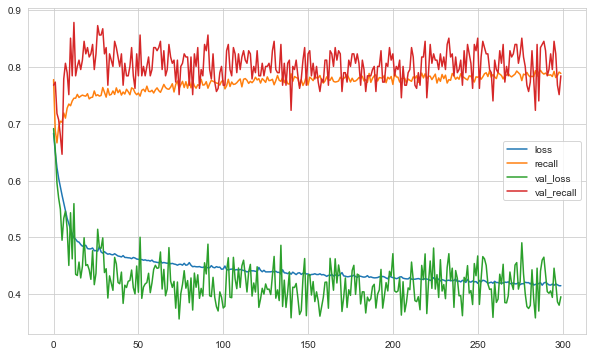

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [90]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[640 156]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.50      0.76      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



32/32 [==============================] - 0s 1ms/step


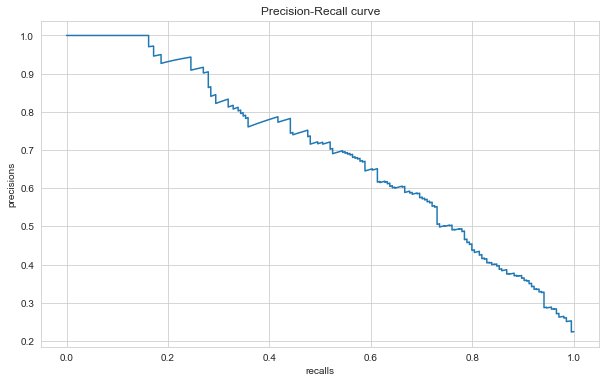

In [91]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [92]:
average_precision_score(y_test, y_pred_proba)

0.6945585037571748

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [93]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr =0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [94]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6459 - recall: 0.7179 - val_loss: 0.5949 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5950 - recall: 0.6834 - val_loss: 0.6509 - val_recall: 0.8785
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5653 - recall: 0.7100 - val_loss: 0.5274 - val_recall: 0.8177
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5207 - recall: 0.7464 - val_loss: 0.5549 - val_recall: 0.8785
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5079 - recall: 0.7464 - val_loss: 0.4494 - val_recall: 0.8177
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4956 - recall: 0.7482 - val_loss: 0.4252 - val_recall: 0.7624
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4889 - recall: 0.7591 - val_loss: 0.4179 - val_recall: 0.8122
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4218 - recall: 0.7924 - val_loss: 0.4412 - val_recall: 0.8232
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4246 - recall: 0.7972 - val_loss: 0.4443 - val_recall: 0.8066
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.8015 - val_loss: 0.4670 - val_recall: 0.8122
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4183 - recall: 0.8015 - val_loss: 0.4233 - val_recall: 0.8011
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4230 - recall: 0.7978 - val_loss: 0.4411 - val_recall: 0.7956
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4177 - recall: 0.7984 - val_loss: 0.3980 - val_recall: 0.7901
Epoch 66/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4157 - recall: 0.8063 - val_loss: 0.4742 - val_recall: 0.8232
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3947 - recall: 0.8196 - val_loss: 0.4157 - val_recall: 0.7293
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3913 - recall: 0.8148 - val_loss: 0.4599 - val_recall: 0.7735
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3878 - recall: 0.8208 - val_loss: 0.5052 - val_recall: 0.8122
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4002 - recall: 0.8275 - val_loss: 0.4073 - val_recall: 0.7182
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3937 - recall: 0.8190 - val_loss: 0.4444 - val_recall: 0.7680
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3906 - recall: 0.8160 - val_loss: 0.4460 - val_recall: 0.7348
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3905 - recall: 0.8305 - val_loss: 0.4501 - val_recall: 0.7459
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3711 - recall: 0.8305 - val_loss: 0.4644 - val_recall: 0.7514
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3747 - recall: 0.8251 - val_loss: 0.4534 - val_recall: 0.7182
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3688 - recall: 0.8317 - val_loss: 0.4835 - val_recall: 0.7403
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3743 - recall: 0.8354 - val_loss: 0.4795 - val_recall: 0.7403
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3757 - recall: 0.8251 - val_loss: 0.4518 - val_recall: 0.7238
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3696 - recall: 0.8317 - val_loss: 0.4611 - val_recall: 0.7459
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3700 - recall: 0.8323 - val_loss: 0.4879 - val_recall: 0.7514
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3521 - recall: 0.8366 - val_loss: 0.4889 - val_recall: 0.7182
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3607 - recall: 0.8293 - val_loss: 0.5196 - val_recall: 0.7569
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3540 - recall: 0.8432 - val_loss: 0.5132 - val_recall: 0.7348
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3548 - recall: 0.8360 - val_loss: 0.4893 - val_recall: 0.7569
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3533 - recall: 0.8426 - val_loss: 0.4955 - val_recall: 0.7238
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3542 - recall: 0.8511 - val_loss: 0.4978 - val_recall: 0.7403
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3495 - recall: 0.8420 - val_loss: 0.5210 - val_recall: 0.7459
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.8493 - val_loss: 0.5350 - val_recall: 0.7569
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3464 - recall: 0.8559 - val_loss: 0.5047 - val_recall: 0.7017
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3391 - recall: 0.8511 - val_loss: 0.5135 - val_recall: 0.7072
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3459 - recall: 0.8493 - val_loss: 0.5069 - val_recall: 0.7127
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3357 - recall: 0.8499 - val_loss: 0.5427 - val_recall: 0.7348


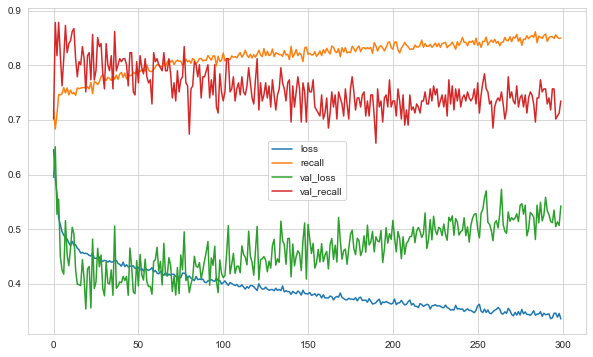

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();
#Overfitting göyüküyor.

In [96]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[609 187]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.83       796
           1       0.45      0.74      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.78      1000



### Add Dropout Layer

In [97]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # %20 kapatiyor.

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [98]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 8ms/step - loss: 0.6908 - recall: 0.6646 - val_loss: 0.6801 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6758 - recall: 0.6429 - val_loss: 0.6698 - val_recall: 0.7017
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6600 - recall: 0.6435 - val_loss: 0.6116 - val_recall: 0.5801
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6515 - recall: 0.6368 - val_loss: 0.5945 - val_recall: 0.5856
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6419 - recall: 0.6374 - val_loss: 0.6158 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6331 - recall: 0.6283 - val_loss: 0.5740 - val_recall: 0.6575
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6216 - recall: 0.6447 - val_loss: 0.6000 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4878 - recall: 0.7724 - val_loss: 0.4350 - val_recall: 0.8177
Epoch 61/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4881 - recall: 0.7627 - val_loss: 0.4110 - val_recall: 0.8122
Epoch 62/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4845 - recall: 0.7591 - val_loss: 0.4705 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4836 - recall: 0.7651 - val_loss: 0.4201 - val_recall: 0.8287
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4924 - recall: 0.7524 - val_loss: 0.4398 - val_recall: 0.8398
Epoch 65/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4865 - recall: 0.7730 - val_loss: 0.4221 - val_recall: 0.8177
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4840 - recall: 0.7597 - val_loss: 0.4332 - val_recall: 0.8343
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.4739 - recall: 0.7754 - val_loss: 0.4360 - val_recall: 0.8343
Epoch 120/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4716 - recall: 0.7863 - val_loss: 0.4142 - val_recall: 0.8177
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4779 - recall: 0.7809 - val_loss: 0.4383 - val_recall: 0.8398
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4722 - recall: 0.7857 - val_loss: 0.4414 - val_recall: 0.8398
Epoch 123/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4719 - recall: 0.7833 - val_loss: 0.4212 - val_recall: 0.8398
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4784 - recall: 0.7736 - val_loss: 0.4133 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4639 - recall: 0.7857 - val_loss: 0.4178 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4637 - recall: 0.7930 - val_loss: 0.4182 - val_recall: 0.8343
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4619 - recall: 0.7990 - val_loss: 0.4145 - val_recall: 0.8232
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4615 - recall: 0.7900 - val_loss: 0.4199 - val_recall: 0.8177
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4583 - recall: 0.7984 - val_loss: 0.4156 - val_recall: 0.8232
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4654 - recall: 0.7851 - val_loss: 0.4123 - val_recall: 0.8122
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4634 - recall: 0.7869 - val_loss: 0.4186 - val_recall: 0.8287
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4572 - recall: 0.7954 - val_loss: 0.4164 - val_recall: 0.8177
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4528 - recall: 0.8111 - val_loss: 0.3938 - val_recall: 0.8122
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4599 - recall: 0.7785 - val_loss: 0.3960 - val_recall: 0.8122
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4586 - recall: 0.8002 - val_loss: 0.4212 - val_recall: 0.8287
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4656 - recall: 0.7990 - val_loss: 0.4076 - val_recall: 0.8177
Epoch 241/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4613 - recall: 0.8033 - val_loss: 0.4182 - val_recall: 0.8232
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4601 - recall: 0.7906 - val_loss: 0.4285 - val_recall: 0.8287
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4579 - recall: 0.8021 - val_loss: 0.4297 - val_recall: 0.8453
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4603 - recall: 0.7785 - val_loss: 0.4184 - val_recall: 0.8232
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4612 - recall: 0.8093 - val_loss: 0.4181 - val_recall: 0.8287
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4516 - recall: 0.7954 - val_loss: 0.4225 - val_recall: 0.8398
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4520 - recall: 0.7918 - val_loss: 0.4237 - val_recall: 0.8122
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4600 - recall: 0.7887 - val_loss: 0.4253 - val_recall: 0.8177


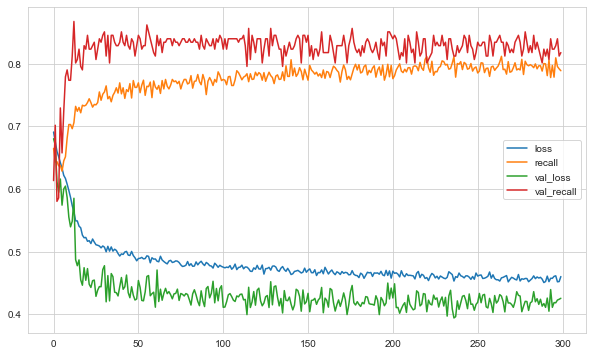

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [100]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[613 183]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       796
           1       0.47      0.80      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [106]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # %20 kapatiyor.

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [107]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [108]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4856 - recall: 0.7718 - val_loss: 0.4234 - val_recall: 0.8232
Epoch 61/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4781 - recall: 0.7669 - val_loss: 0.4055 - val_recall: 0.8066
Epoch 62/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4772 - recall: 0.7645 - val_loss: 0.4758 - val_recall: 0.8564
Epoch 63/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4752 - recall: 0.7591 - val_loss: 0.4367 - val_recall: 0.8343
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4773 - recall: 0.7766 - val_loss: 0.4644 - val_recall: 0.8729
Epoch 65/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4752 - recall: 0.7724 - val_loss: 0.3913 - val_recall: 0.7790
Epoch 66/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4799 - recall: 0.7542 - val_loss: 0.4866 - val_recall: 0.8564
Epoch 67/300
64/64 [===========================

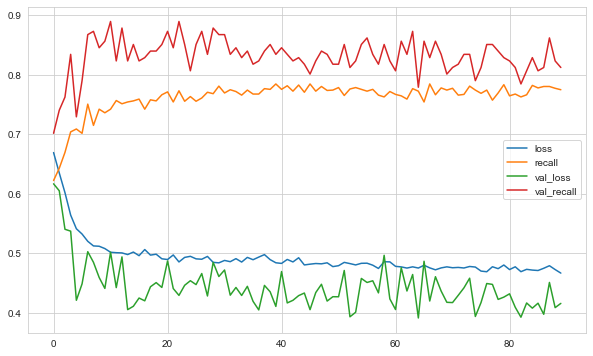

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [110]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[651 145]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       796
           1       0.51      0.75      0.61       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.80      0.82      1000



#### Monitor the "val_recall" as metric

In [111]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # %20 kapatiyor.

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [112]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [113]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

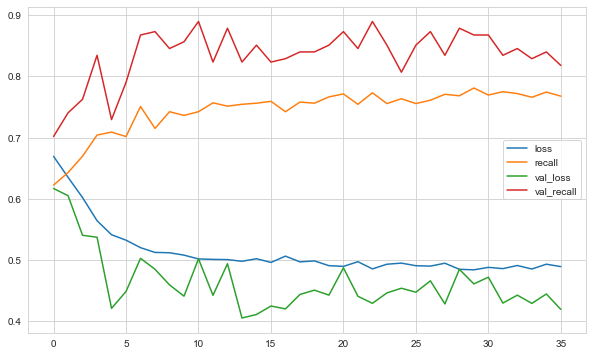

In [114]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [115]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[528 268]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       796
           1       0.39      0.85      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.83      0.70      0.73      1000



## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [116]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [117]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [118]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [119]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [121]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop],class_weight= class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 1s 10ms/step - loss: 0.6695 - recall: 0.6053 - val_loss: 0.5985 - val_recall: 0.6298
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6372 - recall: 0.6429 - val_loss: 0.5908 - val_recall: 0.7182
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6197 - recall: 0.6677 - val_loss: 0.5648 - val_recall: 0.6851
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6094 - recall: 0.6646 - val_loss: 0.5114 - val_recall: 0.6354
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5919 - recall: 0.6998 - val_loss: 0.5069 - val_recall: 0.6906
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5702 - recall: 0.7040 - val_loss: 0.4696 - val_recall: 0.6906
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5572 - recall: 0.7040 - val_loss: 0.4762

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020ECB34BB80>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [122]:
grid_model.best_score_

0.8435406225667255

In [124]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [125]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[528 268]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       796
           1       0.39      0.85      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.83      0.70      0.73      1000



32/32 [==============================] - 0s 1ms/step


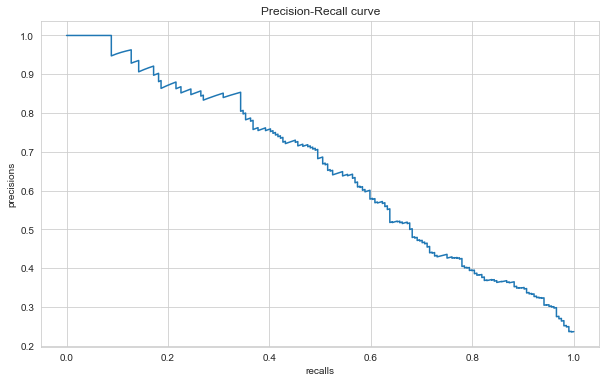

In [126]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [127]:
average_precision_score(y_test, y_pred_proba)

0.6565861596591769

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [128]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr = 0.005)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 5ms/step - loss: 0.6437 - recall: 0.5897 - val_loss: 0.6109 - val_recall: 0.5931
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6074 - recall: 0.6770 - val_loss: 0.5906 - val_recall: 0.6373
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5867 - recall: 0.6978 - val_loss: 0.5944 - val_recall: 0.6814
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5711 - recall: 0.6983 - val_loss: 0.5860 - val_recall: 0.7059
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5598 - recall: 0.7081 - val_loss: 0.5399 - val_recall: 0.6618
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5482 - recall: 0.7087 - val_loss: 0.5800 - val_recall: 0.7500
Epoch 7/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5324 - recall: 0.7283 - val_loss: 0.4732 - val_recall: 0.6176
Epoch 8/200
71/71 [======================

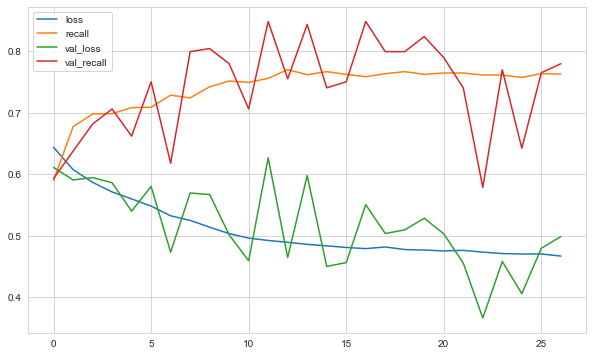

In [129]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [130]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[488 308]
 [ 31 173]]
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       796
           1       0.36      0.85      0.51       204

    accuracy                           0.66      1000
   macro avg       0.65      0.73      0.62      1000
weighted avg       0.82      0.66      0.69      1000



In [131]:
model.save('model_churn.h5')

## Prediction

In [132]:
single_customer =df.drop("Exited", axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [133]:
single_customer = scaler.transform(single_customer.values.reshape(-1,11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [134]:
model.predict(single_customer)

1/1 [==============================] - 0s 21ms/step


array([[0.5980307]], dtype=float32)

In [135]:
df['Exited'].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___